In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
from linprog_lib.method.simplex.components import SimplexProblemConfig
from linprog_lib.method.simplex.solver import SimplexSolver

# 2D Problem

## 1. Unique Solution

### 1.1. Coordinate Replacement Method

In [3]:
config = SimplexProblemConfig(
    method="simplex",
    objective_type="max",
    c=[3, 2],
    A=[
        [1, 2],
        [-1, 1]
    ],
    b=[6, 1],
    constraint_signs=["<=", "<="],
    var_bounds=[">=", ">="],
    problem_form="general",
    print_solution=True,
    print_plot=True,
    print_tables=True,
    verbose=True,
    option="coordinates"
)

In [4]:
print(config.summary())

\[ 
\begin{align*}
\text{max} \quad & 3x_{1} + 2x_{2} \\
\text{subject to} \quad & x_{1} + 2x_{2} \leq 6 \\
& -x_{1} + x_{2} \leq 1 \\
\text{for } \quad & x_{1} \geq 0, x_{2} \geq 0
\end{align*}
\]


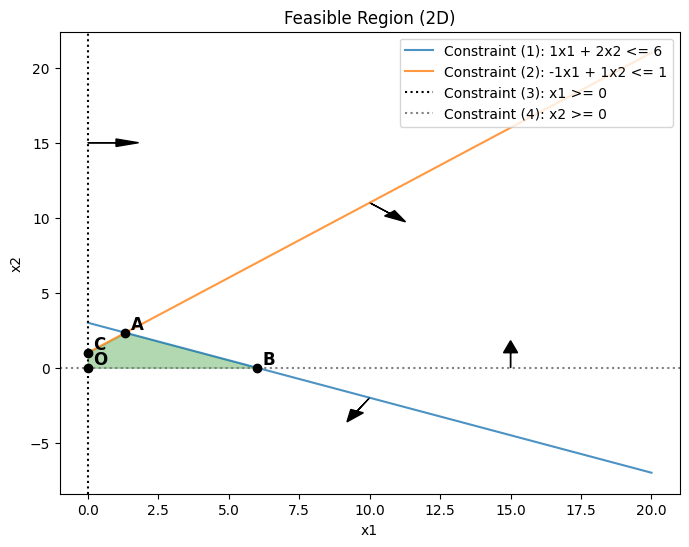

\[
\begin{array}{|c|c|c|c|c|}
\hline
 & A & B & C & O \\ \hline
(x_1,x_2) & (1.33333, 2.33333) & (6, 0) & (-0, 1) & (0, 0) \\ \hline
z & 8.66667 & 18 & 2 & 0 \\ \hline
\end{array}\]

\textbf{Optimal Point}: B = (6.0, 0.0) with \(z^* = 18\).


In [5]:
solver = SimplexSolver(config)
solver.solve()

### 1.2. Objective Function Slippage Method

In [13]:
config = SimplexProblemConfig(
    method="simplex",
    objective_type="max",
    c=[3, 2],
    A=[
        [1, 2],
        [-1, 1]
    ],
    b=[6, 1],
    constraint_signs=["<=", "<="],
    var_bounds=[">=", ">="],
    problem_form="general",
    print_solution=True,
    print_plot=True,
    print_tables=True,
    verbose=True,
    option="objective"
)

In [14]:
print(config.summary())

\[ 
\begin{align*}
\text{max} \quad & 3x_{1} + 2x_{2} \\
\text{subject to} \quad & x_{1} + 2x_{2} \leq 6 \\
& -x_{1} + x_{2} \leq 1 \\
\text{for } \quad & x_{1} \geq 0, x_{2} \geq 0
\end{align*}
\]


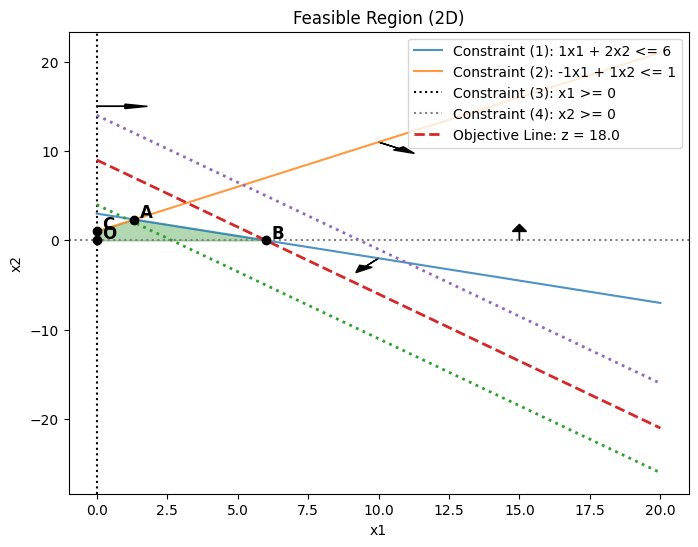


Objective Function Slippage Method:
\[
z = 3x_1 + 2x_2 = 18\\ \text{(optimal, at B)}
\]
\textbf{Optimal Solution}: \(B (6.0, 0.0)\) with \(z^* = 18\).


In [15]:
solver = SimplexSolver(config, step=10.0)
solver.solve()